<a href="https://colab.research.google.com/github/Shraddha-Ingale34/Shraddha-Ingale34.github.io/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


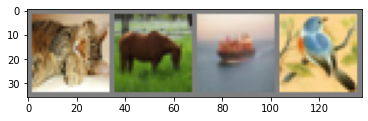

  cat horse  ship  bird


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()



# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 48, 3, 1)
        self.conv2 = nn.Conv2d(48, 96, 3, 1)
        self.conv3 = nn.Conv2d(96, 192, 3, 1)
        self.conv4 = nn.Conv2d(192, 256, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5*5*256, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
       
        x = x.view(-1, 5*5*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.to(device)

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.262
[1,  4000] loss: 1.997
[1,  6000] loss: 1.771
[1,  8000] loss: 1.616
[1, 10000] loss: 1.508
[1, 12000] loss: 1.463
[2,  2000] loss: 1.348
[2,  4000] loss: 1.274
[2,  6000] loss: 1.238
[2,  8000] loss: 1.158
[2, 10000] loss: 1.103
[2, 12000] loss: 1.061
[3,  2000] loss: 0.937
[3,  4000] loss: 0.926
[3,  6000] loss: 0.895
[3,  8000] loss: 0.862
[3, 10000] loss: 0.811
[3, 12000] loss: 0.812
[4,  2000] loss: 0.684
[4,  4000] loss: 0.693
[4,  6000] loss: 0.664
[4,  8000] loss: 0.659
[4, 10000] loss: 0.653
[4, 12000] loss: 0.656
[5,  2000] loss: 0.493
[5,  4000] loss: 0.503
[5,  6000] loss: 0.500
[5,  8000] loss: 0.500
[5, 10000] loss: 0.519
[5, 12000] loss: 0.519
[6,  2000] loss: 0.329
[6,  4000] loss: 0.343
[6,  6000] loss: 0.375
[6,  8000] loss: 0.378
[6, 10000] loss: 0.389
[6, 12000] loss: 0.390
[7,  2000] loss: 0.192
[7,  4000] loss: 0.241
[7,  6000] loss: 0.257
[7,  8000] loss: 0.285
[7, 10000] loss: 0.275
[7, 12000] loss: 0.298
[8,  2000] loss: 0.142
[8,  4000] 

In [22]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

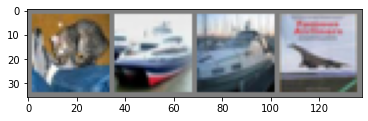

GroundTruth:    cat  ship  ship plane


In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [24]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [25]:
outputs = net(images)

In [26]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [27]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 77 %


In [28]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 78 %
Accuracy of  bird : 66 %
Accuracy of   cat : 58 %
Accuracy of  deer : 77 %
Accuracy of   dog : 67 %
Accuracy of  frog : 85 %
Accuracy of horse : 80 %
Accuracy of  ship : 85 %
Accuracy of truck : 90 %
